<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
#importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Load the data
df = pd.read_csv('annotated_reviews.csv')
df

,document_id,clean_text,sentiment
0,1.0,One of the most anticipated films of the year ...,positive
1,2.0,You'll have to have your wits about you and yo...,positive
2,3.0,I'm a big fan of Nolan's work so was really lo...,positive
3,4.0,"""Oppenheimer"" is a biographical thriller film ...",positive
4,5.0,This movie is just... wow! I don't think I hav...,positive
...,...,...,...
995,NaN,It's isn't a masterpiece. It's a decent biopic...,positive
996,NaN,I'm a big Nolan fan. Maybe this one just wasn'...,positive
997,NaN,My Review - Oppenheimer\nMy Rating Ten plus 10...,positive
998,NaN,Nolan is good at constructing complicated timi...,positive


In [ ]:
print(df.shape)

(1000, 3)


In [ ]:
#1. Features (Text Representation) used for topic modeling:
# Text cleaning
df['clean_text'] = df['clean_text'].str.replace('[^\w\s]','')  #removal of punctuation
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split())) #lower case
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,document_id,clean_text,sentiment,topic
0,1.0,"one anticipated films year many people, includ...",positive,3
1,2.0,wits brain fully switched watching oppenheimer...,positive,2
2,3.0,i'm big fan nolan's work really looking forwar...,positive,7
3,4.0,"""oppenheimer"" biographical thriller film writt...",positive,7
4,5.0,movie just... wow! think ever felt like watchi...,positive,3
...,...,...,...,...
995,NaN,"masterpiece. decent biopic interesting person,...",positive,0
996,NaN,i'm big nolan fan. maybe one me.this movie pro...,positive,4
997,NaN,review - oppenheimer rating ten plus 10/10 cin...,positive,9
998,NaN,nolan good constructing complicated timing eve...,positive,1


In [ ]:
# Text representation using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

In [ ]:
#2. Top 10 clusters for topic modeling:
words = []   #building document-term matrix
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
tokenizer = RegexpTokenizer(r'\w+')
for x in pd.Series(df['clean_text']):
  a = tokenizer.tokenize(x)
  words.append(a)
dictionary = corpora.Dictionary(words)
corpus = [dictionary.doc2bow(word) for word in words]

In [ ]:
import gensim  #LDA model
model = gensim.models.ldamodel.LdaModel(corpus, num_topics = 10, id2word = dictionary,passes = 20)

In [ ]:
model.print_topics(num_topics = 10, num_words = 5)

[(0,
  '0.022*"really" + 0.017*"movie" + 0.017*"time" + 0.013*"s" + 0.013*"nolan"'),
 (1,
  '0.027*"movie" + 0.018*"oppenheimer" + 0.014*"the" + 0.012*"s" + 0.012*"nolan"'),
 (2,
  '0.032*"movie" + 0.016*"film" + 0.011*"s" + 0.011*"oppenheimer" + 0.011*"one"'),
 (3, '0.027*"one" + 0.017*"like" + 0.015*"s" + 0.015*"best" + 0.015*"feel"'),
 (4,
  '0.031*"movie" + 0.021*"story" + 0.016*"s" + 0.014*"one" + 0.014*"nolan"'),
 (5,
  '0.031*"s" + 0.019*"oppenheimer" + 0.017*"nolan" + 0.013*"film" + 0.013*"really"'),
 (6,
  '0.081*"film" + 0.054*"s" + 0.027*"oppenheimer" + 0.027*"nolan" + 0.027*"also"'),
 (7,
  '0.024*"s" + 0.024*"oppenheimer" + 0.013*"nolan" + 0.010*"man" + 0.008*"film"'),
 (8,
  '0.021*"s" + 0.021*"film" + 0.021*"there" + 0.021*"great" + 0.014*"long"'),
 (9,
  '0.032*"oppenheimer" + 0.015*"film" + 0.011*"movie" + 0.009*"the" + 0.009*"time"')]

In [ ]:
#3. Summarize and describe the topic for each cluster:
topic_summary = df.groupby('topic').agg({'clean_text': ' '.join}).reset_index()
for index, row in topic_summary.iterrows():
    print(f"\nTopic {row['topic']} Summary:")
    print(row['clean_text'][:500], "...")


Topic 0 Summary:
got oppenheimeri started worry oppenheimer, seen trailer every time gone cinema. usually, happens movie awful tank.but christopher nolan done it. mission impossible: dead reckoning may second favourite movie year. i'll need see again, make surw.cillian murphy brilliant here. really made feel oppenheimer, really likeable lead character character. surely best actor oscar nomination imminent.robert downey jr amazing, delivers best supporting actor nomination performance!! admittedly i'm biased, alw ...

Topic 1 Summary:
familiar manhattan project social political aftermath, "oppenheimer" excursion known territory.is nolan's finest movie date? really. know even better. touch upon greatness? yes, couple times!the great +++cillian murphy gives one surprising leading man performances ages might win oscar excellent portrayal robert oppenheimer. fully transforms highly complex increasingly conflicted man, eyes ooze tension, voice point, demeanour congruent.the entire 2nd act (

In [ ]:
# Get topic scores for each review
corpus_lda = model[corpus]
num_topics = 10
scores = [[] for _ in range(num_topics)]

for doc in corpus_lda:
    for topic_idx in range(num_topics):
        if len(doc) > topic_idx:
            scores[topic_idx].append(round(doc[topic_idx][1], 2))
        else:
            scores[topic_idx].append(0)

# Print the scores assigned for each topic for each review
for i, topic_scores in enumerate(scores):
    print(f"Topic {i} scores:")
    print(topic_scores)

Topic 0 scores:
[1.0, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 1.0, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 1.0, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 1.0, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 1.0, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 1.0, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.99, 1.0, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 1.0, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 0.99, 0.99, 0.99, 1.0, 1.0, 0.99, 0.

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here
import pandas as pd
imdb_data=pd.read_csv('https://raw.githubusercontent.com/Sowmika26/INFO_5731/main/annotated_reviews.csv')
print(imdb_data.shape)


(1000, 3)


In [ ]:
imdb_data.head()

,document_id,clean_text,sentiment
0,1.0,One of the most anticipated films of the year ...,positive
1,2.0,You'll have to have your wits about you and yo...,positive
2,3.0,I'm a big fan of Nolan's work so was really lo...,positive
3,4.0,"""Oppenheimer"" is a biographical thriller film ...",positive
4,5.0,This movie is just... wow! I don't think I hav...,positive


In [ ]:
imdb_data['sentiment'].value_counts()

sentiment
positive    960
negative     40
Name: count, dtype: int64

In [ ]:
#1 features for the sentiment classification
import nltk
imdb_data['clean_text'] = imdb_data['clean_text'].str.replace('[^\w\s]','')  #removal of punctuation
imdb_data['clean_text'] = imdb_data['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))#lower case
from nltk.corpus import stopwords #removal of stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
imdb_data['clean_text'] = imdb_data['clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
imdb_data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,document_id,clean_text,sentiment
0,1.0,"one anticipated films year many people, includ...",positive
1,2.0,wits brain fully switched watching oppenheimer...,positive
2,3.0,i'm big fan nolan's work really looking forwar...,positive
3,4.0,"""oppenheimer"" biographical thriller film writt...",positive
4,5.0,movie just... wow! think ever felt like watchi...,positive


In [1]:
'''
Removal of Punctuation: Punctuation marks do not typically contribute to sentiment analysis and can add noise to the data. Therefore, removing punctuation helps focus on the essential words and improves the accuracy of sentiment classification.
Lowercasing: Converting all text to lowercase ensures consistency in the data and prevents duplication of words due to case sensitivity. It helps standardize the text and reduces the complexity of the analysis.
Removal of Stopwords: Stopwords are common words in a language (e.g., "the," "is," "and") that occur frequently but often do not carry significant meaning in sentiment analysis tasks. Removing stopwords reduces noise in the data and helps focus on the sentiment-carrying words, improving the accuracy of sentiment classification.
'''

'\nRemoval of Punctuation: Punctuation marks do not typically contribute to sentiment analysis and can add noise to the data. Therefore, removing punctuation helps focus on the essential words and improves the accuracy of sentiment classification.\nLowercasing: Converting all text to lowercase ensures consistency in the data and prevents duplication of words due to case sensitivity. It helps standardize the text and reduces the complexity of the analysis.\nRemoval of Stopwords: Stopwords are common words in a language (e.g., "the," "is," "and") that occur frequently but often do not carry significant meaning in sentiment analysis tasks. Removing stopwords reduces noise in the data and helps focus on the sentiment-carrying words, improving the accuracy of sentiment classification.\n'

In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   document_id  24 non-null     float64
 1   clean_text   1000 non-null   object 
 2   sentiment    1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize a TfidfVectorizer
tfidf_vector = TfidfVectorizer()
# Transform the 'Sentiment' column using TfidfVectorizer
X_tfidf = tfidf_vector.fit_transform(df['sentiment'])
# Print the shape of the resulting TF-IDF matrix
print(X_tfidf.shape)

(1000, 2)


In [ ]:
#2 Select two of the supervised learning models
# Import necessary libraries for machine learning models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

# Create a Linear Support Vector Classifier (SVM) instance
svm_classifier = LinearSVC()
# Create a Logistic Regression classifier instance
logistic_regression_classifier = LogisticRegression()


In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X_tfidf,
    df['sentiment'],
    test_size=0.2,
    random_state=111
)
# Initialize and train the Multinomial Naive Bayes model
model_svm_classifier = svm_classifier.fit(x_train, y_train)

In [ ]:
#3 Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms
# Import necessary libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Use the trained Linear Support Vector Classifier (SVM) to make predictions on the test set (x_test)
y_pred_svm = svm_classifier.predict(x_test)

# Print the accuracy score of the Linear Support Vector Classifier (SVM) model
print('Accuracy:', accuracy_score(y_test, y_pred_svm))

# Print the classification report for Linear Support Vector Classifier (SVM), which includes precision, recall, and F1-score
print('Classification Report for Linear Support Vector Classifier (SVM):')
print(classification_report(y_test, y_pred_svm))

# Perform cross-validation for Linear Support Vector Classifier (SVM)
svm_scores = cross_val_score(svm_classifier, x_test, y_test, cv=5)
print("Cross Validation Scores using Linear Support Vector Classifier (SVM):", svm_scores)

Accuracy: 1.0
Classification Report for Linear Support Vector Classifier (SVM):
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         7
    positive       1.00      1.00      1.00       193

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Cross Validation Scores using Linear Support Vector Classifier (SVM): [1. 1. 1. 1. 1.]


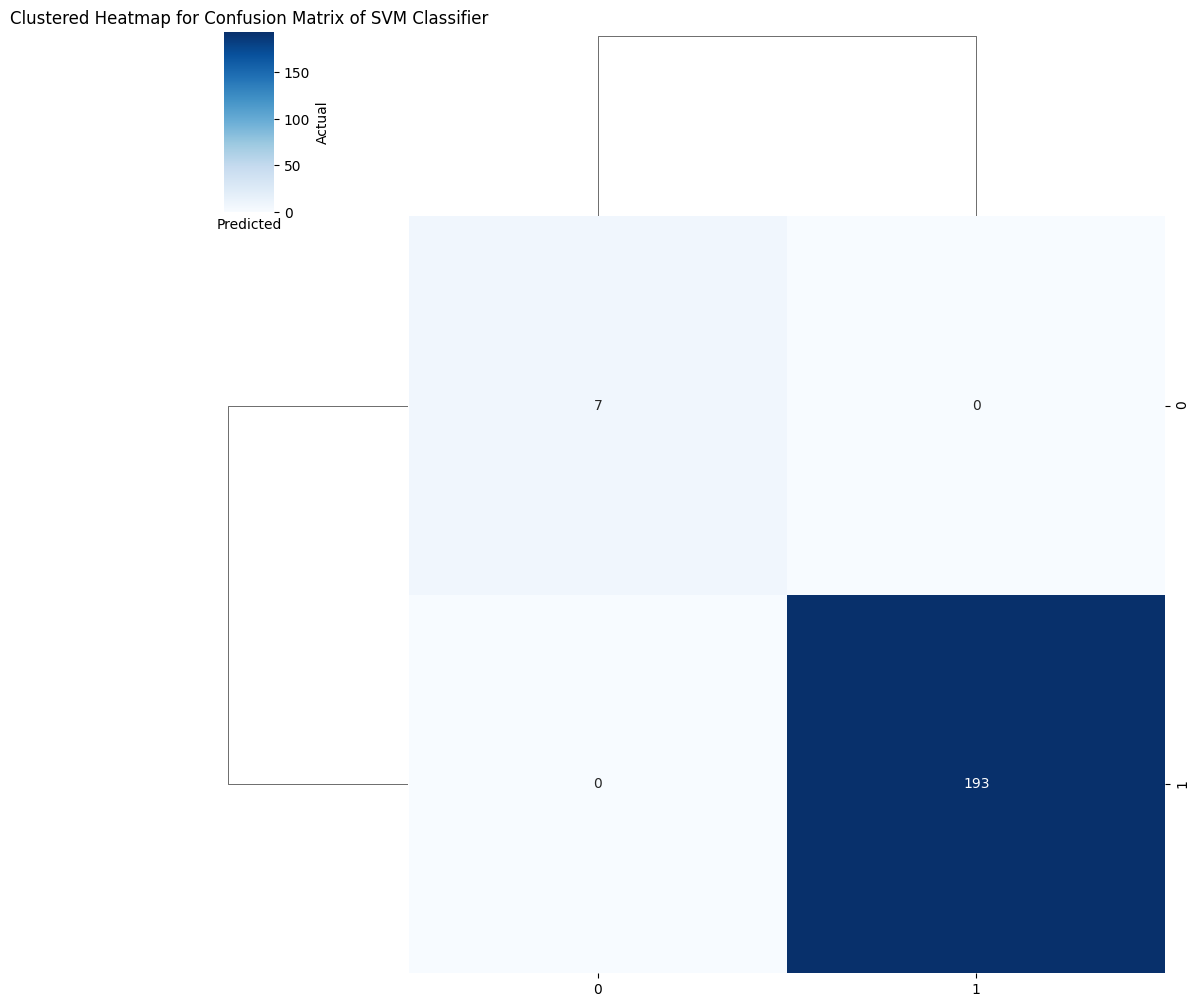

In [ ]:
# Import necessary libraries for model evaluation
from sklearn.metrics import confusion_matrix

# Define your confusion matrix for SVM (assuming you have already calculated it)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the clustered heatmap for the confusion matrix of SVM
sns.clustermap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Clustered Heatmap for Confusion Matrix of SVM Classifier')
plt.show()

In [ ]:
# Fit the Logistic Regression classifier to the training data
logistic_regression_classifier.fit(x_train, y_train)

# Use the trained Logistic Regression classifier to make predictions on the test set (x_test)
y_pred_logistic_regression = logistic_regression_classifier.predict(x_test)

# Print the accuracy score of the Logistic Regression classifier
print('Accuracy:', accuracy_score(y_test, y_pred_logistic_regression))

# Print the classification report for the Logistic Regression classifier
print('Classification Report for Logistic Regression classifier:')
print(classification_report(y_test, y_pred_logistic_regression))

# Perform cross-validation for Logistic Regression classifier
logistic_regression_scores = cross_val_score(logistic_regression_classifier, x_test, y_test, cv=5)
print("Cross Validation Scores using Logistic Regression classifier:", logistic_regression_scores)

# Generate confusion matrix for Logistic Regression classifier
cm_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

Accuracy: 1.0
Classification Report for Logistic Regression classifier:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         7
    positive       1.00      1.00      1.00       193

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Cross Validation Scores using Logistic Regression classifier: [1. 1. 1. 1. 1.]


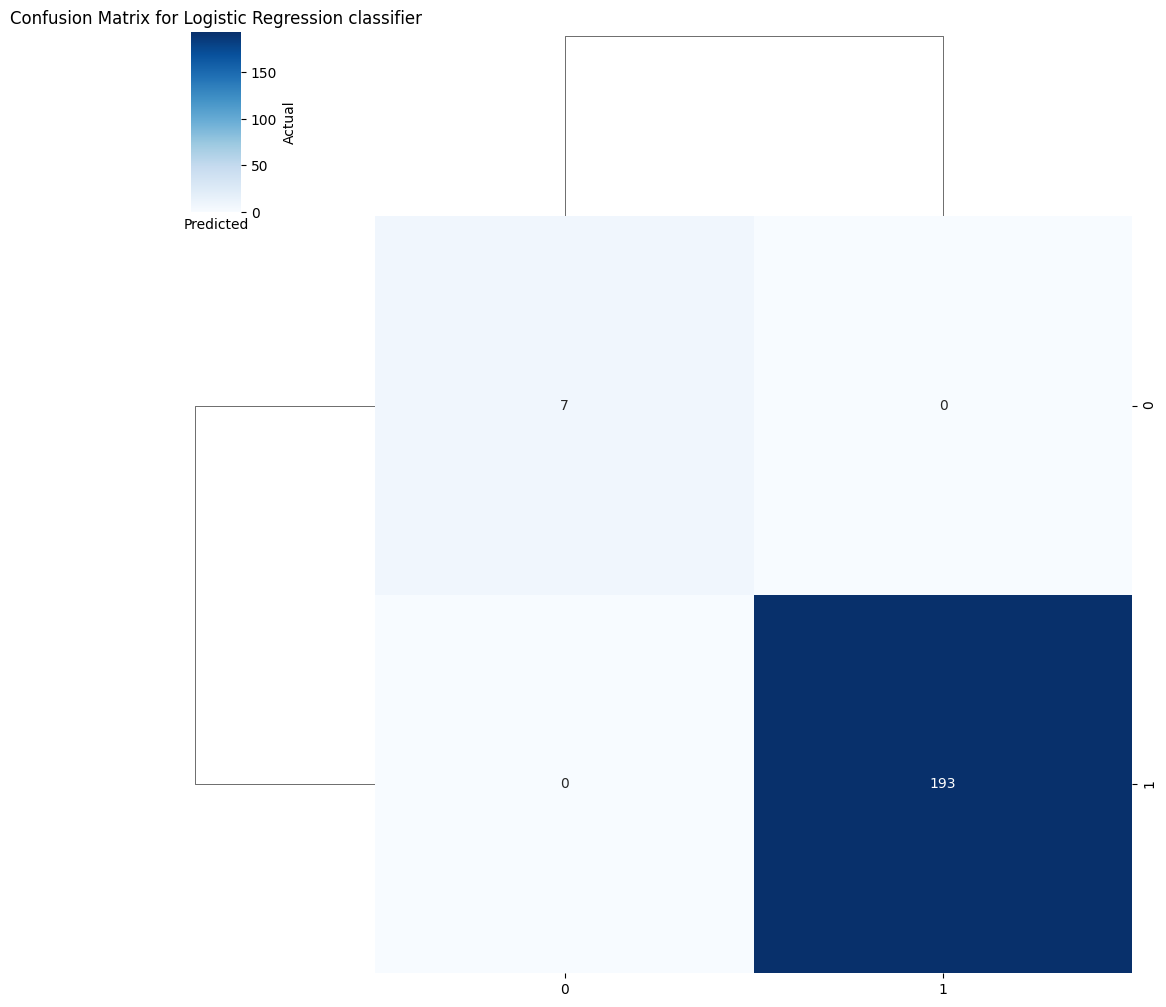

In [ ]:
import numpy as np

# Clustered Heatmap
sns.clustermap(cm_logistic_regression, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression classifier')
plt.show()

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
# Read training and testing data
import pandas as pd
train = pd.read_csv('test.csv')

#1  Split data for training and testing.
validation = pd.read_csv('train.csv')

In [ ]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
print(train.isnull().sum())
validation.describe()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
print(validation.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


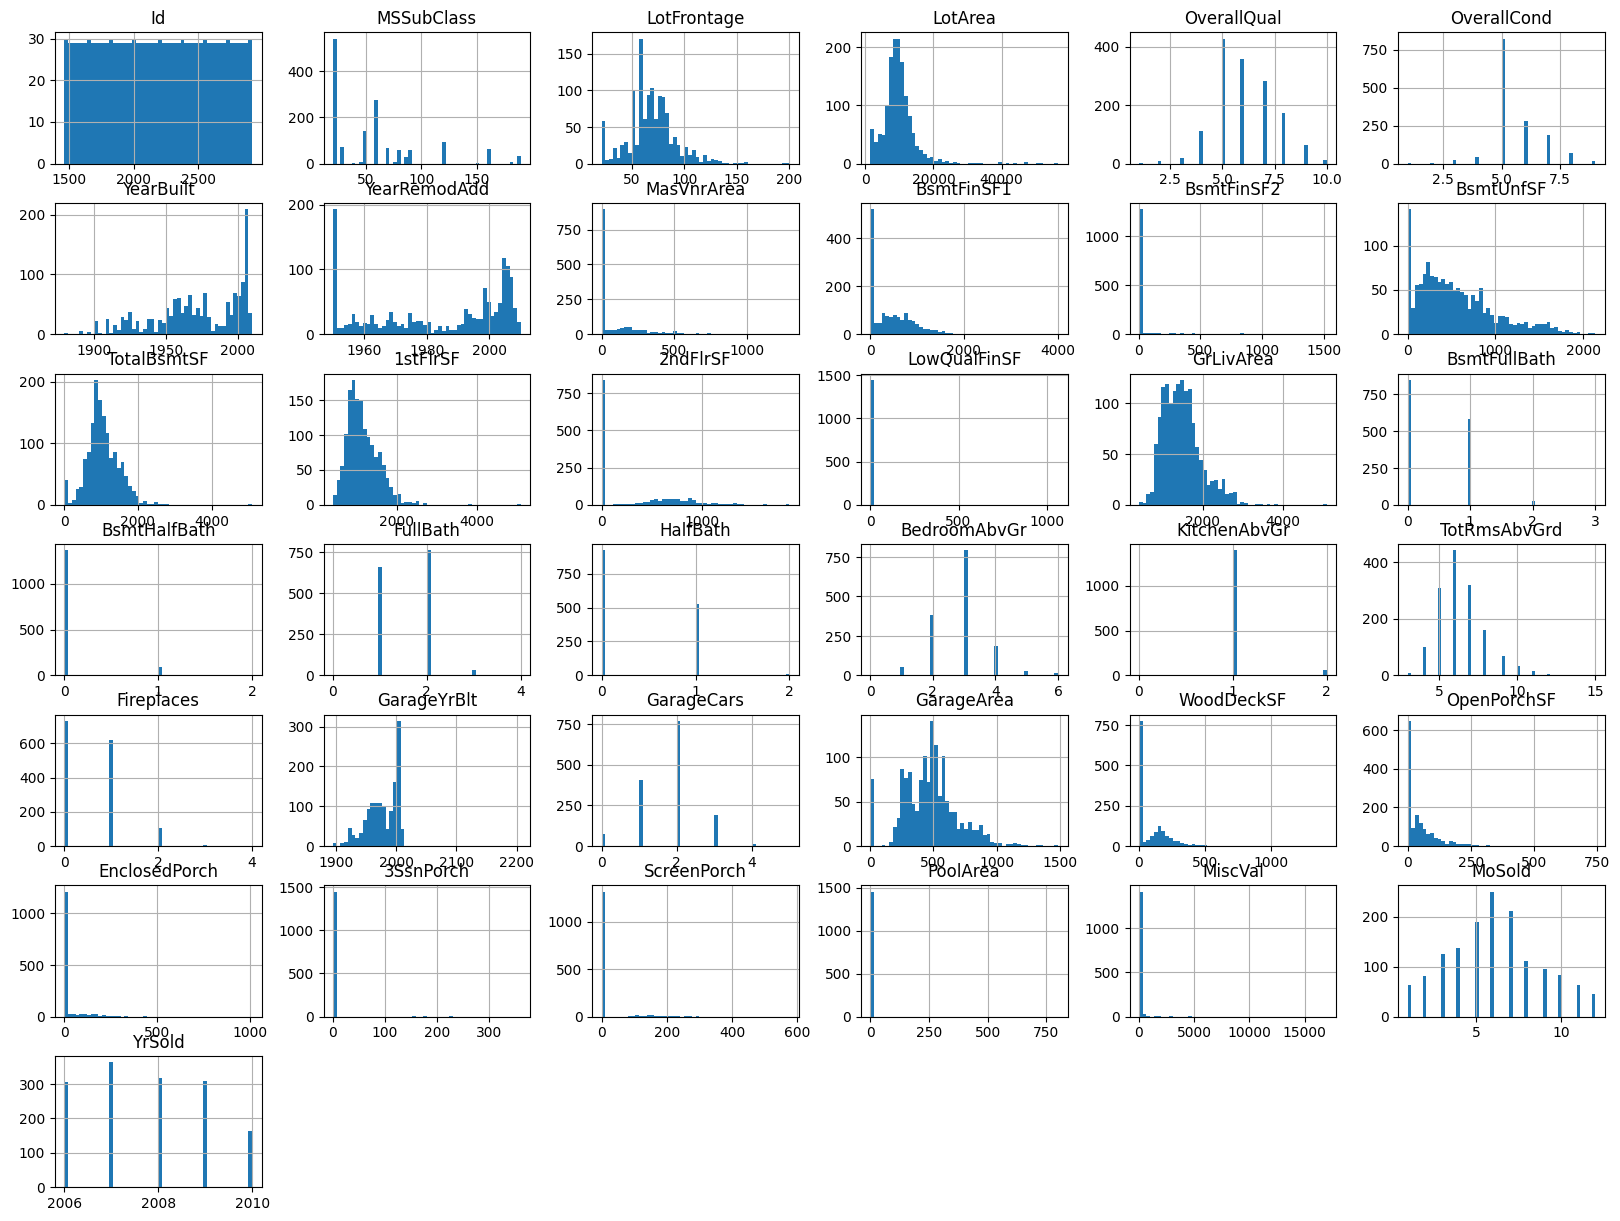

In [ ]:
#2. EDA results, select a number of features for the regression model.
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

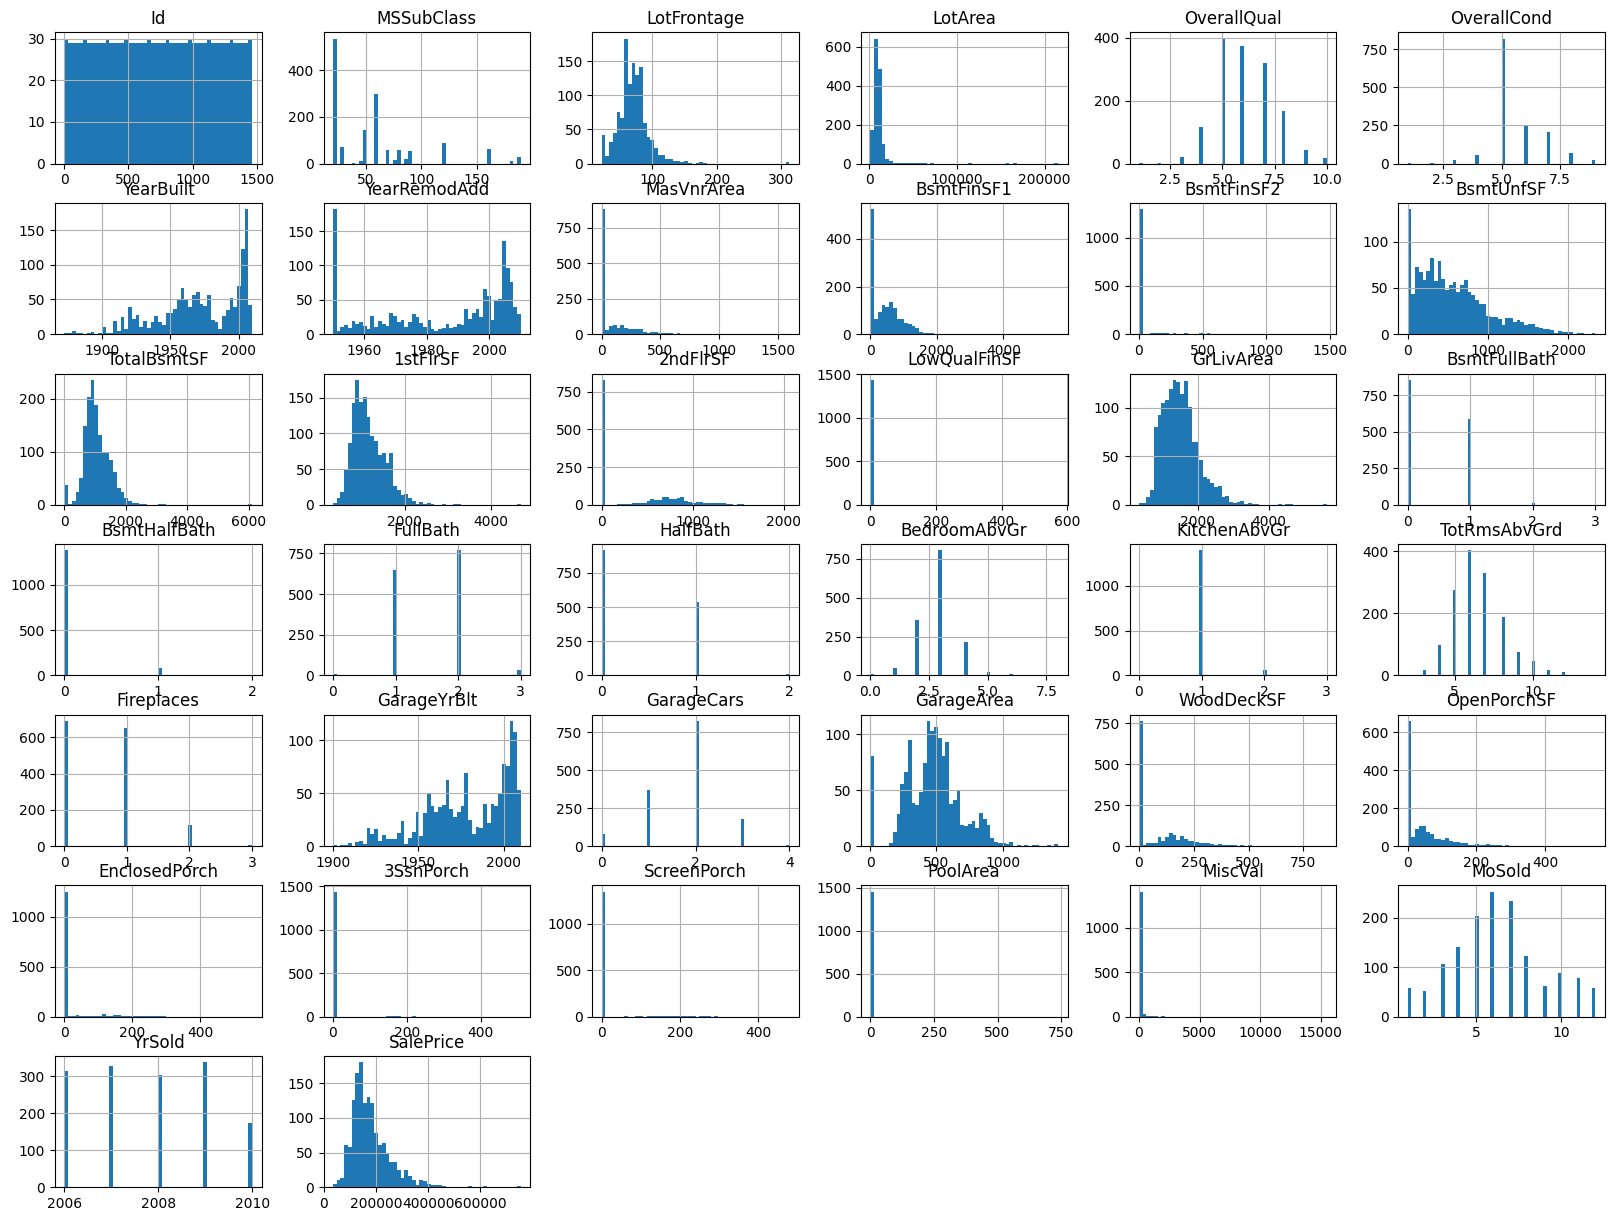

In [ ]:
validation.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
#  encoding for categorical columns
train_encoded = pd.get_dummies(train, columns=columns_with_non_numeric_values)
corr_matrix = train_encoded.corr()
corr_matrix["YrSold"].sort_values(ascending=False)

YrSold                   1.000000
SaleCondition_Normal     0.126588
SaleType_WD              0.103477
SaleType_Oth             0.069718
BsmtExposure_No          0.060820
                           ...   
SaleCondition_AdjLand   -0.065318
MoSold                  -0.163924
SaleCondition_Partial   -0.169403
SaleType_New            -0.170770
Id                      -0.974884
Name: YrSold, Length: 270, dtype: float64

<Axes: xlabel='OverallQual', ylabel='YrSold'>

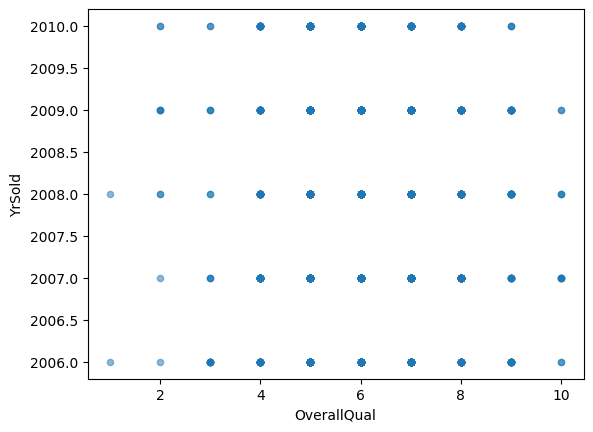

In [ ]:
train.plot(kind="scatter", x="OverallQual", y="YrSold", alpha=0.5)

In [ ]:
import numpy as np
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(999, inplace=True)

In [6]:
'''
Overall Quality (OverallQual): This feature is often a significant predictor in housing price models as it represents the overall material and finish quality of the house. It's likely to have a strong impact on the sale price.
Total Basement Area (TotalBsmtSF): The size of the basement is an important factor in determining the overall size and value of a house. Houses with larger basements tend to command higher prices.
Total Living Area (GrLivArea): The total living area is another crucial factor affecting house prices. Larger living areas typically translate to higher prices.
Number of Bedrooms (BedroomAbvGr): The number of bedrooms in a house is a fundamental feature that directly influences its desirability and value.
Number of Bathrooms (FullBath and HalfBath): The number of bathrooms is a key consideration for homebuyers and can significantly impact the price of a property.
Garage Area (GarageArea): The size of the garage or carport can affect the attractiveness and value of a property, especially for buyers with vehicles.
Year Built (YearBuilt): The age of the property can influence its condition, maintenance needs, and perceived value. Newer properties often command higher prices.
Neighborhood (Neighborhood): The neighborhood in which a house is located plays a significant role in determining its price. Desirable neighborhoods with good amenities and schools tend to have higher property values.
'''

"\nOverall Quality (OverallQual): This feature is often a significant predictor in housing price models as it represents the overall material and finish quality of the house. It's likely to have a strong impact on the sale price.\nTotal Basement Area (TotalBsmtSF): The size of the basement is an important factor in determining the overall size and value of a house. Houses with larger basements tend to command higher prices.\nTotal Living Area (GrLivArea): The total living area is another crucial factor affecting house prices. Larger living areas typically translate to higher prices.\nNumber of Bedrooms (BedroomAbvGr): The number of bedrooms in a house is a fundamental feature that directly influences its desirability and value.\nNumber of Bathrooms (FullBath and HalfBath): The number of bathrooms is a key consideration for homebuyers and can significantly impact the price of a property.\nGarage Area (GarageArea): The size of the garage or carport can affect the attractiveness and value

In [ ]:
#3. Develop a regression model
#Train and build the regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotShape', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning','LotConfig')
for i in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train[i].values))
    train[i] = encoder.transform(list(train[i].values))
for j in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(validation[j].values))
    validation[j] = encoder_test.transform(list(validation[j].values))

x_train = train[train.columns[:80]]
y_train = train['YrSold']
x_validation = validation[validation.columns[:80]]

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
#4.  R-squared value
r_squared = regressor.score(x_train, y_train)
print("R-squared value:", r_squared)

R-squared value: 1.0


In [ ]:
import numpy as np
train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(999, inplace=True)
#House Price Prediction
regressor.predict(x_train)

array([ 4.00000000e+00,  4.00000000e+00,  4.00000000e+00, ...,
       -2.27134998e-13,  1.66985874e-13,  4.48312641e-13])

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [5]:
# 1: Selection and Description of the Pre-trained Language Model (PLM)
'''
Chosen Model: roberta-base

1. Model: DistilBERT (Distilled version of the popular BERT model)
2. Original Pretraining Data Sources: Trained on a massive corpus of text data, including Wikipedia (the online encyclopedia) and BookCorpus (a dataset of books)
3. Number of Parameters: Approximately 66 million parameters, significantly smaller than the original BERT model (around 110 million parameters), making it more computationally efficient while retaining good performance
4. Task-specific Fine-tuning: The model has been further fine-tuned on the Stanford Sentiment Treebank (SST-2) dataset, a widely-used benchmark for binary sentiment classification tasks, adapting it specifically for sentiment analysis
5. Advantages: Computationally efficient compared to larger models, good out-of-the-box performance on sentiment analysis tasks due to fine-tuning on a relevant dataset, user-friendly integration with the Hugging Face Transformers library
6. Disadvantages: Despite being a distilled version, it may not perform as well as larger language models like the original BERT, potential domain mismatch between the pretraining/fine-tuning data and the specific task or dataset, which could affect performance

'''

'\nChosen Model: roberta-base\n\n1. Model: DistilBERT (Distilled version of the popular BERT model)\n2. Original Pretraining Data Sources: Trained on a massive corpus of text data, including Wikipedia (the online encyclopedia) and BookCorpus (a dataset of books)\n3. Number of Parameters: Approximately 66 million parameters, significantly smaller than the original BERT model (around 110 million parameters), making it more computationally efficient while retaining good performance\n4. Task-specific Fine-tuning: The model has been further fine-tuned on the Stanford Sentiment Treebank (SST-2) dataset, a widely-used benchmark for binary sentiment classification tasks, adapting it specifically for sentiment analysis\n5. Advantages: Computationally efficient compared to larger models, good out-of-the-box performance on sentiment analysis tasks due to fine-tuning on a relevant dataset, user-friendly integration with the Hugging Face Transformers library\n6. Disadvantages: Despite being a disti

In [ ]:
#2 Accuracy,Precision,Recall and F1 score
import pandas as pd
from transformers import pipeline

# Load data
data = pd.read_csv('annotated_reviews.csv')
# Take only the first 50 reviews
data = data.head(50)
# Load RoBERTa-based zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="roberta-base")
# Perform sentiment analysis
data['predicted_sentiment'] = data['clean_text'].apply(
    lambda x: classifier(x, candidate_labels=["positive", "negative", "neutral"])['labels'][0]
)
# Display predictions for the first 50 reviews
data[['clean_text', 'sentiment', 'predicted_sentiment']].head()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


,clean_text,sentiment,predicted_sentiment
0,One of the most anticipated films of the year ...,positive,neutral
1,You'll have to have your wits about you and yo...,positive,positive
2,I'm a big fan of Nolan's work so was really lo...,positive,positive
3,"""Oppenheimer"" is a biographical thriller film ...",positive,neutral
4,This movie is just... wow! I don't think I hav...,positive,neutral


In [ ]:
#importing libraries
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
# Extract true and predicted labels
true_labels = data['sentiment']
predicted_labels = data['predicted_sentiment']

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.2
Precision: 0.2777777777777778
Recall: 0.06944444444444445
F1 Score: 0.11111111111111112


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
#3. Discussion of Advantages, Disadvantages, and Challenges
'''
Advantages of RoBERTa:
  1.High Performance: The strong architecture coupled with large-scale pre-training data of RoBERTa enables it to achieve the state-of-the-art benchmark across multiple natural language processing tasks, including sentiment analysis.
  2.Contextual Understanding: The bidirectional architecture of RoBERTa allows context-rich information in textual form to better comprehend language nuances and semantics, which are very crucial for sentiment analysis.
  3.Transfer learning: By pre-training RoBERTa on large-scale text corpora, effective transfer learning with relatively small quantities of task-specific data that can be fine-tuned is made possible, hence its applicability to a wide range of downstream tasks.
  4.Flexible fine-tuning: Flexible fine-tuning in RoBERTa allows varied usage of training objectives and hyperparameters, hence adapting to a specified problem in sentiment analysis and datasets.

Disadvantages:
  1.Computational resources: Training and fine-tuning of RoBERTa models necessitate hefty computational resources, involving powerful GPUs or TPUs and huge memories.
  2.Data Dependency: RoBERTa is highly dependent on the quality and size of pretraining data. In domains with less data or data from specific domains, fine-tuning may not work well.
  3.Domain Adaptation: Although RoBERTa works well on different domains, it may still need fine-tuning for optimal performance on certain tasks or datasets. But it should be done with domain expertise through data manual annotation.

Challenges:
  1. Data Preprocessing: Preparing the data for RoBERTa input, including tokenization, padding, and encoding, requires careful handling to ensure compatibility with the model's requirements.
  2. Fine-Tuning Hyperparameters: Identifying the optimal hyperparameters for fine-tuning RoBERTa, such as learning rate, batch size, and number of training epochs, can be challenging and may require extensive experimentation.
  3. Interpretability: Despite its high performance, RoBERTa's complex architecture makes it challenging to interpret the model's decisions, limiting insight into how sentiment analysis predictions are made.
'''

"\nAdvantages of RoBERTa:\n  1.High Performance: The strong architecture coupled with large-scale pre-training data of RoBERTa enables it to achieve the state-of-the-art benchmark across multiple natural language processing tasks, including sentiment analysis.\n  2.Contextual Understanding: The bidirectional architecture of RoBERTa allows context-rich information in textual form to better comprehend language nuances and semantics, which are very crucial for sentiment analysis.\n  3.Transfer learning: By pre-training RoBERTa on large-scale text corpora, effective transfer learning with relatively small quantities of task-specific data that can be fine-tuned is made possible, hence its applicability to a wide range of downstream tasks.\n  4.Flexible fine-tuning: Flexible fine-tuning in RoBERTa allows varied usage of training objectives and hyperparameters, hence adapting to a specified problem in sentiment analysis and datasets.\n\nDisadvantages:\n  1.Computational resources: Training an